# Happy customers

Apziva project #1<br>
2023 06 15

__Summary:__
* From 6 survey questions about product delivery in the fictional company ACME, a subset of only 2 questions could be identified as relevant for overall customer satisfaction:
    * "my order was delivered on time" 
    * "I am satisfied with my courier"
* A test accuracy of 75% was reached.
* However, there were only 126 records to work on, a sample size at the very low end for ML projects.

## TOC: <a class="anchor" id="TOC"></a>
* [Task description](#TaskDescription)
* [Utilities](#Utilities)
* [General settings](#GeneralSetting)
* [Data retrieval](#DataManagement)
* [EDA](#EDA)
    * [Basic data properties](#BasicDataProperties)
    * [Distributions](#Distributions)   
* [Train / test split](#TrainTestSplit)      
* [Models](#Models)   
    * [Baseline](#Baseline)   
    * [Lasso regression](#LassoRegression) 
* [Conclusions](#Conclusions)       

## Task description <a class="anchor" id="TaskDescription"></a>
[TOC](#TOC)

* Background:
    * We are one of the fastest growing __startups in the logistics and delivery domain__. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.
    * We thrive on __making our customers happy__. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to __measure how happy each customer__ is. If we can __predict what makes our customers happy__ or unhappy, we can then take necessary actions.
    * Getting __feedback__ from customers is __not easy__ either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.
    * We recently did a __survey__ to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a __private test set__.
    
* Data Description:
    * Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
    * X1 = my order was delivered on time
    * X2 = contents of my order was as I expected
    * X3 = I ordered everything I wanted to order
    * X4 = I paid a good price for my order
    * X5 = I am satisfied with my courier
    * X6 = the app makes ordering easy for me
    * Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.
* Goals:
    * __Predict__ if a customer is __happy__ or not __based on the answers__ they give to questions asked.
* Success Metrics:
    * Reach 73% accuracy score or above, or convince us why your solution is superior. We are definitely interested in every solution and insight you can provide us.
    * Try to submit your working solution as soon as possible. The sooner the better.
* Bonuses:
    * We are very interested in finding which questions/features are more important when predicting a customer’s happiness (__feature importance__). 
    * Using a feature selection approach show us understand what is the minimal set of attributes/features that would preserve the most information about the problem while increasing predictability of the data we have. 
    * Is there any __question that we can remove__ in our next survey?    

__Decision:__
 * As the company holds back data serving as a test set, one could opt to use all data for training and validation in real-life project, without keeping any of the given data apart as a test set.
 * As however a critical accuracy score is given by the project design, I will work with the __classical train-valid-test split__ for this project.

## Utilities <a class="anchor" id="Utilities"></a>
[TOC](#TOC)

In [1]:
# own libraries
import Utilities as u
import MachineLearning as ml

# activate changes in libraries
import importlib
importlib.reload(u)
importlib.reload(ml)

# aliases
from Utilities import TypeChecker as t
from Utilities import PrintAlias as p

## General settings <a class="anchor" id="GeneralSetting"></a>
[TOC](#TOC)

In [2]:
# constants
cfltRandomSeed = 42 # any number

cstrSourcePath = "RawExcelData"
cstrSourceFile = "ACME-HappinessSurvey2020.csv"
cintTestSize   = 8

dstrLookupQuestionTexts ={
    "X1":"my order was delivered on time",
    "X2":"contents of my order was as I expected",
    "X3":"I ordered everything I wanted to order",
    "X4":"I paid a good price for my order",
    "X5":"I am satisfied with my courier",
    "X6":"the app makes ordering easy for me"
}

lstrFeatures = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']

__Remark:__
* All questions have the __same direction__, i.e. 1 meaning "bad" and 5 meaning "good".
* Thus, no need to revert the values later, for none of the X variables.

## Data retrieval <a class="anchor" id="DataManagement"></a>
[TOC](#TOC)

In [3]:
import pandas as pd

# get raw data
dfrRaw = pd.read_csv(f"{cstrSourcePath}/{cstrSourceFile}")
dfrRaw

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


# EDA <a class="anchor" id="EDA"></a>
[TOC](#TOC)

## Basic data properties <a class="anchor" id="BasicDataProperties"></a>
[TOC](#TOC)

In [4]:
u.DisplayDataFrame(dfrRaw.describe())
dfrRaw.info()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


__Observations:__
* No missing values.
* All integers.
* All features running from 1 to 5.
* Target either 0 or 1.
* The dataset is very small.

__Decision:__
* To get accuracies that can reasonably be compared to the goal of 73% (as given by the project design) I will have to choose as few as __8 records for the test set__. By doing so, accuracies can be multiples of 12.5%, e.g. 62.5%, 75%, 87.5%, 100%. Such a low test size should be regarded as critical (see further below).
* The dataset being so small, I can choose the usually more time-consuming __Lasso regression__ over a feature selection/linear regression approach. Lasso will do the feature selection process automatically.

## Distributions <a class="anchor" id="Distributions"></a>
[TOC](#TOC)

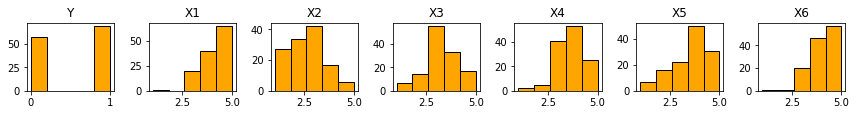

In [5]:
ml.DrawDistributionPlots (dfrRaw, dfrRaw.columns,
    intDiagramColumns=len(dfrRaw.columns),
    intBins=5
)

__Remarks:__
* The target classes are fairly balanced.
* X1 and X6 are negatively skewed.

__Decision:__
* It is reasonable to try some transformations.

TRANSFORMATIONS

Transformation 'log10', inversion = False:


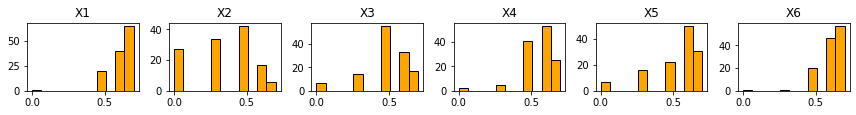

Transformation 'square', inversion = False:


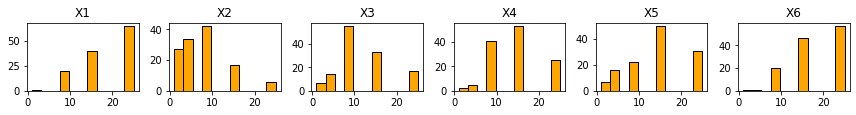

Transformation 'sqrt', inversion = False:


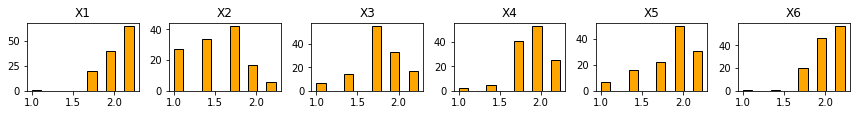

Transformation 'log10', inversion = True:


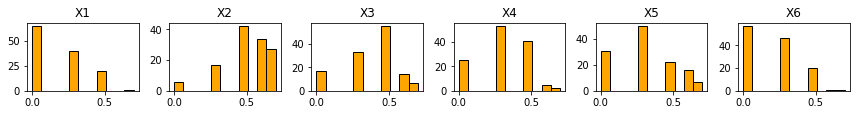

Transformation 'square', inversion = True:


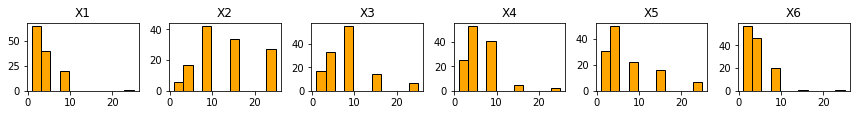

Transformation 'sqrt', inversion = True:


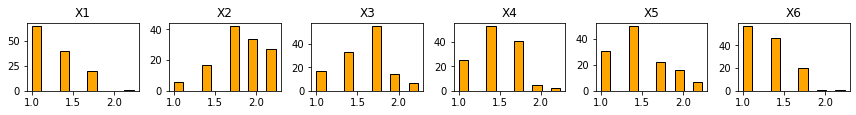

In [6]:
import numpy as np
import pandas as pd

lstrTransformations = ["log10","square","sqrt"]

# try different transformations
p("Transformations".upper())
p()
for blnInvert in [False, True]:
    for strTransformation in lstrTransformations:
        p(f"Transformation '{strTransformation}', inversion = {blnInvert}:")
        dfrTransformed = dfrRaw.copy()
        if blnInvert:
            dfrTransformed[lstrFeatures] = 6 - dfrTransformed[lstrFeatures]
        dfrTransformed[lstrFeatures] = eval(f"np.{strTransformation}(dfrTransformed[lstrFeatures])")
        ml.DrawDistributionPlots (dfrTransformed.drop("Y",axis=1), lstrFeatures, intDiagramColumns=len(dfrTransformed.columns))

__Remarks:__
* None of these transformations is convincing.
* I will continue with the raw data.

# Train / test split <a class="anchor" id="TrainTestSplit"></a>
[TOC](#TOC)

In [7]:
from sklearn.model_selection import train_test_split

# feature and target
X = dfrRaw.drop("Y", axis=1)
y = dfrRaw["Y"]

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=cintTestSize, random_state=cfltRandomSeed)
p("Shapes after split:")
X_train.shape, X_test.shape, y_train.shape, y_test.shape

Shapes after split:


((118, 6), (8, 6), (118,), (8,))

In [8]:
from sklearn.preprocessing import StandardScaler
objStandardScaler = StandardScaler()
X_train = objStandardScaler.fit_transform(X_train)
X_test  = objStandardScaler.transform(X_test)
cintExamples = 3
p(f"{cintExamples} rows of values after the split".upper())
p("\nTrain\n",X_train[:cintExamples])
p("\nTest\n",X_test[:cintExamples])

3 ROWS OF VALUES AFTER THE SPLIT

Train
 [[ 0.81984512 -1.42287689  1.63843523  1.44360673  1.18334403  0.9383088 ]
 [-1.69292693 -1.42287689 -1.29088836  0.28479316 -0.61839268  0.9383088 ]
 [ 0.81984512  1.28517913 -0.31444717 -0.8740204  -0.61839268  0.9383088 ]]

Test
 [[ 0.81984512 -0.52019155 -0.31444717 -0.8740204  -1.51926104  0.9383088 ]
 [-0.43654091 -0.52019155  0.66199403  0.28479316  0.28247567 -0.33433992]
 [-1.69292693  1.28517913  0.66199403  1.44360673 -2.42012939 -1.60698863]]


# Models <a class="anchor" id="Models"></a>
[TOC](#TOC)

## Baseline <a class="anchor" id="Baseline"></a>
[TOC](#TOC)

In [9]:
from sklearn.dummy import DummyClassifier
objDummyClassifier = DummyClassifier(strategy="most_frequent")
objDummyClassifier.fit(X_train, y_train)
fltAccuracy = objDummyClassifier.score(X_test, y_test)
p("Baseline classifier using 'most frequent' strategy:")
p(fltAccuracy)

Baseline classifier using 'most frequent' strategy:
0.375


## Lasso regression <a class="anchor" id="LassoRegression"></a>
[TOC](#TOC)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# pipeline and hyperparameters
pipeline = Pipeline([
    ('lasso', LogisticRegression(penalty='l1', solver='liblinear'))
])
dvarHyperparameters = {
    'lasso__random_state': [cfltRandomSeed],
    'lasso__C': [0.001,0.01, 0.1, 1,10,100,1000],  # regularization
    'lasso__max_iter': [100, 200, 500,1000]
}

# grid search with cross-validation
objGridSearch = GridSearchCV(pipeline, dvarHyperparameters, cv=5)
objGridSearch.fit(X_train, y_train)

# get and evaluate best model
pipBestModel = objGridSearch.best_estimator_
fltBestScore = objGridSearch.best_score_
fltTestScore = pipBestModel.score(X_test, y_test)
a1fltRegressionParameters = pipBestModel.named_steps['lasso'].coef_
dfrWeights = {
    "Feature": dstrLookupQuestionTexts.keys(),
    "Question": dstrLookupQuestionTexts.values(),
    "Regression weight": a1fltRegressionParameters.flatten()
}

# output
p("Best model:           ", pipBestModel)
p("Best accuracy (CV):   ", fltBestScore)
p("Test accuracy:        ", fltTestScore)
p("Size of test set:     ", cintTestSize)
p("Resolution test score:", round(1/cintTestSize,3))
pd.DataFrame(dfrWeights)

Best model:            Pipeline(steps=[('lasso',
                 LogisticRegression(C=0.1, penalty='l1', random_state=42,
                                    solver='liblinear'))])
Best accuracy (CV):    0.5608695652173913
Test accuracy:         0.75
Size of test set:      8
Resolution test score: 0.125


,Feature,Question,Regression weight
0,X1,my order was delivered on time,0.210919
1,X2,contents of my order was as I expected,0.000000
2,X3,I ordered everything I wanted to order,0.000000
3,X4,I paid a good price for my order,0.000000
4,X5,I am satisfied with my courier,0.024970
5,X6,the app makes ordering easy for me,0.000000


# Conclusions <a class="anchor" id="Conclusions"></a>
[TOC](#TOC)

* A test accuracy of 0.75 (i.e. 75%) could be reached.
    * The test accuracy is clearly higher than the baseline: 0.75 > 0.375.
    * The test accuracy is slightly higher than the threshold given in the project design (0.75 > 0.73).
* Choosing a test size of only 8 records means: 'squeezing out the data':
    * The test score of 0.75 might change with different random state values.
    * It is highly recommended that ACME gets more survey data to get to informed decisions.
* Lasso automatically delivers feature selection:
    * Only the features X1 and X5 get regression weights different from 0.
    * Thus, the two questions "my order was delivered on time" and "I am satisfied with my courier" should be sufficient.
    * Reducing the survey to these two questions might also help to get more survey data from the clients.